In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [3]:
df=pd.read_csv("21days_raw_data.csv")

In [4]:
df.shape

(551136, 9)

In [5]:
df.columns

Index(['Unnamed: 0', 'driver_id', 'tripid', 'points', 'Actualduration',
       'AverageP', 'distance', 'duration', 'Unnamed: 0.1'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0          int64
driver_id          object
tripid              int64
points              int64
Actualduration    float64
AverageP          float64
distance          float64
duration          float64
Unnamed: 0.1      float64
dtype: object

In [7]:
df.head()

,Unnamed: 0,driver_id,tripid,points,Actualduration,AverageP,distance,duration,Unnamed: 0.1
0,0,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181813898,62,631.0,10.177419,2.04,621.0,NaN
1,1,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181816907,453,5211.0,11.503311,18.02,5195.0,NaN
2,2,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181844705,91,911.0,10.010989,3.12,900.0,NaN
3,3,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181861325,76,769.0,10.118421,0.54,750.0,NaN
4,4,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181871430,54,546.0,10.111111,3.33,530.0,NaN


In [8]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True ) 

In [9]:
df

,driver_id,tripid,points,Actualduration,AverageP,distance,duration
0,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181813898,62,631.0,10.177419,2.04,621.0
1,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181816907,453,5211.0,11.503311,18.02,5195.0
2,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181844705,91,911.0,10.010989,3.12,900.0
3,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181861325,76,769.0,10.118421,0.54,750.0
4,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181871430,54,546.0,10.111111,3.33,530.0
...,...,...,...,...,...,...,...
551131,ffefa9fc58deb38517fe5176a458e9cac5c125f15bae31...,198740997,169,3809.0,22.538462,0.56,1690.0
551132,fff4cf77e4aa669df808c1ea6644a7297ed41ff8ab4c63...,198710096,105,2971.0,28.295238,5.13,1040.0
551133,fff4cf77e4aa669df808c1ea6644a7297ed41ff8ab4c63...,198740263,20,3702.0,185.100000,1.79,190.0
551134,fff81139a7dd8a3a48f462347a5611b8e0b84258237d5d...,198740094,206,2059.0,9.995146,12.96,2050.0


#### trip duration

In [10]:
df1= df.copy() 


In [11]:
df1['Actualduration'].describe()

count    5.511360e+05
mean     2.029594e+03
std      9.614870e+03
min      3.000000e+00
25%      6.330000e+02
50%      1.224000e+03
75%      2.329000e+03
max      3.536470e+06
Name: Actualduration, dtype: float64

In [12]:
def data_distribution(data):
 
    x = np.array(data)
    
    # set the number of bins using the Rice rule
    # n_bins = twice cube root of number of observations
    n = len(x)
    n_bins = round(2 * n**(1/3))
    fig = plt.figure()
    
    # histogram
    ax1 = fig.add_axes([0.1, 0.3, 0.8, 0.6])
    ax1 = plt.hist(x, bins=n_bins, alpha=0.7)
    plt.grid(alpha=.5)
    
    # boxplot
    ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.2])
    ax2 = plt.boxplot(x, vert=False, widths=0.7)
    plt.grid(alpha=.5)
           
    plt.show()

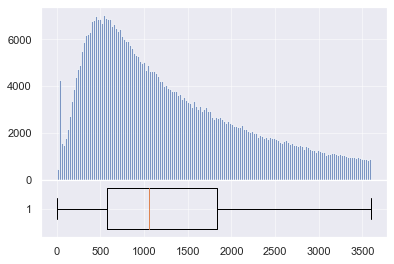

In [13]:
data_distribution(df["Actualduration"][df1["Actualduration"] <= 3600])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f31eadab50>,
 'caps': [<matplotlib.lines.Line2D at 0x1f31eaea2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f31eada7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f31eaea9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f31eaead60>],
 'means': []}

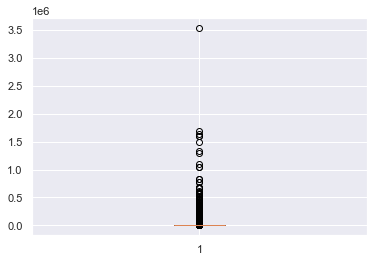

In [14]:
plt.boxplot(df1.Actualduration)

In [15]:
print( df1['Actualduration'].nlargest(10))

209852    3536470.0
140477    1696410.0
159050    1637995.0
185192    1607111.0
264624    1596157.0
94900     1484220.0
419378    1338833.0
528095    1299271.0
4111      1103878.0
220898    1044960.0
Name: Actualduration, dtype: float64


In [16]:
df1=df1[df1.Actualduration!=df1.Actualduration.max()]

c:\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution after the treatment of outliers')

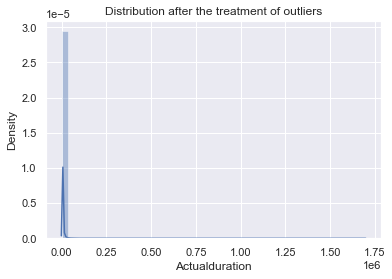

In [17]:
sns.distplot(df1['Actualduration'])
plt.title('Distribution after the treatment of outliers')

In [18]:
bins=np.array([0,600,1200,1800,3600,5400,7200])
df1['duration_time_minutes']=pd.cut(df1.Actualduration,bins,labels=["<10", "10-20", "20-30","30-60","60-90",">90"])

In [19]:
df1

,driver_id,tripid,points,Actualduration,AverageP,distance,duration,duration_time_minutes
0,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181813898,62,631.0,10.177419,2.04,621.0,10-20
1,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181816907,453,5211.0,11.503311,18.02,5195.0,60-90
2,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181844705,91,911.0,10.010989,3.12,900.0,10-20
3,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181861325,76,769.0,10.118421,0.54,750.0,10-20
4,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181871430,54,546.0,10.111111,3.33,530.0,<10
...,...,...,...,...,...,...,...,...
551131,ffefa9fc58deb38517fe5176a458e9cac5c125f15bae31...,198740997,169,3809.0,22.538462,0.56,1690.0,60-90
551132,fff4cf77e4aa669df808c1ea6644a7297ed41ff8ab4c63...,198710096,105,2971.0,28.295238,5.13,1040.0,30-60
551133,fff4cf77e4aa669df808c1ea6644a7297ed41ff8ab4c63...,198740263,20,3702.0,185.100000,1.79,190.0,60-90
551134,fff81139a7dd8a3a48f462347a5611b8e0b84258237d5d...,198740094,206,2059.0,9.995146,12.96,2050.0,30-60


In [20]:
df1['duration_time_minutes'].value_counts()

10-20    143079
<10      128217
30-60    125473
20-30     89105
60-90     37577
>90       12413
Name: duration_time_minutes, dtype: int64

In [21]:
df1.shape

(551135, 8)

In [22]:
((143079+128217+125473+89105+37577)/551134)*100   

94.97708361305962

#### 94.97% trips are less than 1 hour and 30 minutes 

In [23]:
df1.dropna(subset = ["duration_time_minutes"], inplace=True)

In [24]:
df1.shape

(535864, 8)

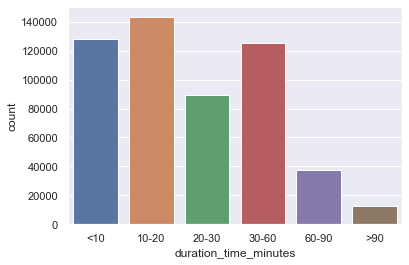

In [25]:
ax = sns.countplot(x='duration_time_minutes', data=df1) 


### considering average points 

In [26]:
df2= df.copy() 


In [27]:
bins=np.array([0,5,10,11,12,13,14,15,100])
df2['point_interval']=pd.cut(df2.AverageP,bins,labels=["<5", "5-10", "10-11","11-12","12-13","13-14",'14-15','>15'])

In [28]:
df2

,driver_id,tripid,points,Actualduration,AverageP,distance,duration,point_interval
0,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181813898,62,631.0,10.177419,2.04,621.0,10-11
1,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181816907,453,5211.0,11.503311,18.02,5195.0,11-12
2,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181844705,91,911.0,10.010989,3.12,900.0,10-11
3,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181861325,76,769.0,10.118421,0.54,750.0,10-11
4,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181871430,54,546.0,10.111111,3.33,530.0,10-11
...,...,...,...,...,...,...,...,...
551131,ffefa9fc58deb38517fe5176a458e9cac5c125f15bae31...,198740997,169,3809.0,22.538462,0.56,1690.0,>15
551132,fff4cf77e4aa669df808c1ea6644a7297ed41ff8ab4c63...,198710096,105,2971.0,28.295238,5.13,1040.0,>15
551133,fff4cf77e4aa669df808c1ea6644a7297ed41ff8ab4c63...,198740263,20,3702.0,185.100000,1.79,190.0,NaN
551134,fff81139a7dd8a3a48f462347a5611b8e0b84258237d5d...,198740094,206,2059.0,9.995146,12.96,2050.0,5-10


In [29]:
df2.shape

(551136, 8)

In [30]:
df2.isna().sum()

driver_id             0
tripid                0
points                0
Actualduration        0
AverageP              0
distance              0
duration              0
point_interval    23544
dtype: int64

In [31]:
df2.dropna(subset = ["point_interval"], inplace=True)

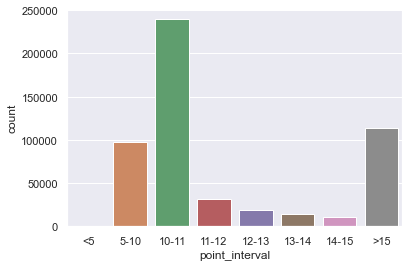

In [32]:
ax = sns.countplot(x='point_interval', data=df2) 

In [35]:
df2['point_interval'].value_counts()

10-11    239712
>15      113321
5-10      97865
11-12     31658
12-13     19294
13-14     14473
14-15     11267
<5            2
Name: point_interval, dtype: int64

In [36]:
df2.shape

(527592, 8)

In [37]:
(239712+97865)/527592

0.6398448043184886

In [38]:
(239712+97865+31658)/527592

0.6998495049204688

In [39]:
(113321/527592)*100

21.478907944017347

#### considering distance 

In [40]:
df3= df.copy() 

In [41]:
bins=np.array([0,0.25,0.5,1,5,10,15,20,30,50,100])
df3['distance_interval']=pd.cut(df3.distance,bins,labels=["<0.25","0.25-0.5",'0.5-1', "1-5", "5-10","10-15","15-20","20-30",'30-50','>50'])

In [42]:
df3

,driver_id,tripid,points,Actualduration,AverageP,distance,duration,distance_interval
0,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181813898,62,631.0,10.177419,2.04,621.0,1-5
1,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181816907,453,5211.0,11.503311,18.02,5195.0,15-20
2,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181844705,91,911.0,10.010989,3.12,900.0,1-5
3,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181861325,76,769.0,10.118421,0.54,750.0,0.5-1
4,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181871430,54,546.0,10.111111,3.33,530.0,1-5
...,...,...,...,...,...,...,...,...
551131,ffefa9fc58deb38517fe5176a458e9cac5c125f15bae31...,198740997,169,3809.0,22.538462,0.56,1690.0,0.5-1
551132,fff4cf77e4aa669df808c1ea6644a7297ed41ff8ab4c63...,198710096,105,2971.0,28.295238,5.13,1040.0,5-10
551133,fff4cf77e4aa669df808c1ea6644a7297ed41ff8ab4c63...,198740263,20,3702.0,185.100000,1.79,190.0,1-5
551134,fff81139a7dd8a3a48f462347a5611b8e0b84258237d5d...,198740094,206,2059.0,9.995146,12.96,2050.0,10-15


In [43]:
df3.isna().sum()

driver_id                0
tripid                   0
points                   0
Actualduration           0
AverageP                 0
distance                 0
duration                 0
distance_interval    36082
dtype: int64

In [44]:
df3.dropna(subset = ["distance_interval"], inplace=True)

In [45]:
df3.shape

(515054, 8)

In [48]:
df3['distance_interval'].value_counts()

1-5         222034
5-10        102733
<0.25        51090
0.5-1        40733
10-15        38552
0.25-0.5     22827
15-20        16269
20-30        12236
30-50         6233
>50           2347
Name: distance_interval, dtype: int64

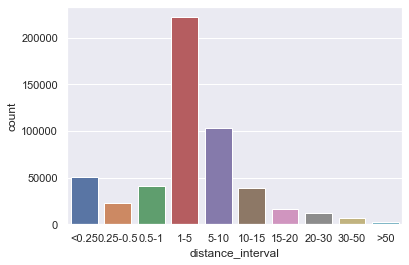

In [50]:
ax = sns.countplot(x='distance_interval', data=df3) 

In [51]:
(222034+102733+38552+16269+40733+12236+6233)/515054

0.851930088883884

In [52]:
bins=np.array([0,600,1200,1800,3600,5400,7200])
df['duration_time_minutes']=pd.cut(df.Actualduration,bins,labels=["<10", "10-20", "20-30","30-60","60-90",">90"])

In [53]:
bins=np.array([0,5,10,11,12,13,14,15,100])
df['point_interval']=pd.cut(df.AverageP,bins,labels=["<5", "5-10", "10-11","11-12","12-13","13-14",'14-15','>15'])

In [54]:
bins=np.array([0,0.25,0.5,1,5,10,15,20,30,50,100])
df['distance_interval']=pd.cut(df.distance,bins,labels=["<0.25","0.25-0.5",'0.5-1', "1-5", "5-10","10-15","15-20","20-30",'30-50','>50'])

In [55]:
df

,driver_id,tripid,points,Actualduration,AverageP,distance,duration,duration_time_minutes,point_interval,distance_interval
0,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181813898,62,631.0,10.177419,2.04,621.0,10-20,10-11,1-5
1,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181816907,453,5211.0,11.503311,18.02,5195.0,60-90,11-12,15-20
2,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181844705,91,911.0,10.010989,3.12,900.0,10-20,10-11,1-5
3,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181861325,76,769.0,10.118421,0.54,750.0,10-20,10-11,0.5-1
4,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181871430,54,546.0,10.111111,3.33,530.0,<10,10-11,1-5
...,...,...,...,...,...,...,...,...,...,...
551131,ffefa9fc58deb38517fe5176a458e9cac5c125f15bae31...,198740997,169,3809.0,22.538462,0.56,1690.0,60-90,>15,0.5-1
551132,fff4cf77e4aa669df808c1ea6644a7297ed41ff8ab4c63...,198710096,105,2971.0,28.295238,5.13,1040.0,30-60,>15,5-10
551133,fff4cf77e4aa669df808c1ea6644a7297ed41ff8ab4c63...,198740263,20,3702.0,185.100000,1.79,190.0,60-90,NaN,1-5
551134,fff81139a7dd8a3a48f462347a5611b8e0b84258237d5d...,198740094,206,2059.0,9.995146,12.96,2050.0,30-60,5-10,10-15


In [56]:
df.drop(df.index[df['duration_time_minutes'] == '>90'], inplace = True)


In [57]:
df.drop(df.index[df['point_interval'] == '>15'], inplace = True)

In [58]:
df.drop(df.index[df['point_interval'] == '<5'], inplace = True)

In [59]:
df.drop(df.index[df['point_interval'] == '14-15'], inplace = True)

In [60]:
df.drop(df.index[df['point_interval'] == '13-14'], inplace = True)

In [61]:
df.drop(df.index[df['point_interval'] == '12-13'], inplace = True)

In [62]:
df.reset_index(drop=True)

,driver_id,tripid,points,Actualduration,AverageP,distance,duration,duration_time_minutes,point_interval,distance_interval
0,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181813898,62,631.0,10.177419,2.04,621.0,10-20,10-11,1-5
1,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181816907,453,5211.0,11.503311,18.02,5195.0,60-90,11-12,15-20
2,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181844705,91,911.0,10.010989,3.12,900.0,10-20,10-11,1-5
3,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181861325,76,769.0,10.118421,0.54,750.0,10-20,10-11,0.5-1
4,0001da624eada828c3f744b73bacd8e15cf0d3e288bd09...,181871430,54,546.0,10.111111,3.33,530.0,<10,10-11,1-5
...,...,...,...,...,...,...,...,...,...,...
386755,ffefa9fc58deb38517fe5176a458e9cac5c125f15bae31...,198657035,87,864.0,9.931034,7.28,860.0,10-20,5-10,5-10
386756,ffefa9fc58deb38517fe5176a458e9cac5c125f15bae31...,198670521,198,1977.0,9.984848,10.05,1970.0,30-60,5-10,10-15
386757,fff4cf77e4aa669df808c1ea6644a7297ed41ff8ab4c63...,198740263,20,3702.0,185.100000,1.79,190.0,60-90,NaN,1-5
386758,fff81139a7dd8a3a48f462347a5611b8e0b84258237d5d...,198740094,206,2059.0,9.995146,12.96,2050.0,30-60,5-10,10-15


In [63]:
df.drop(df.index[df['distance_interval'] == '>50'], inplace = True)

In [64]:
df.shape

(385701, 10)

In [79]:
#df.to_csv('clean_gps.csv')